## Set up Environment

In [45]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation


In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

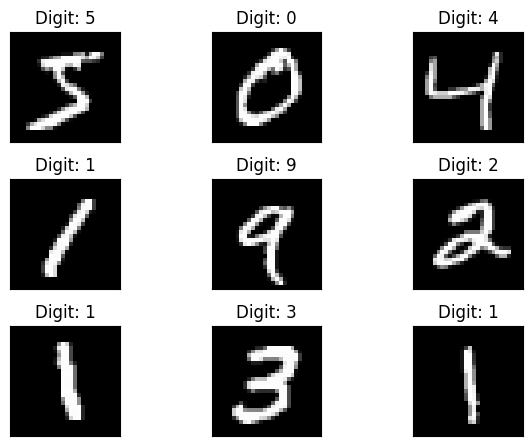

In [47]:
# Plot the MNIST data
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [48]:
#Let’s verify the sizes of the training and testing datasets:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [49]:
# Print the labels
print(y_train.shape)

(60000,)


## Cleaning the data
# Reshape the dataset for Keras model


In [50]:
# save input image dimensions
img_rows, img_cols = 28, 28

# 1 * M * N to M * N * 1
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)

x_train.shape


(60000, 784)

In [51]:
#Normalize
# Change Pixel vaues to the range [0,1]
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)
x_train /= 255.0
x_test /= 255.0


x_train.shape

(60000, 784)

In [52]:
# change y_train to a binary class matrix
from keras.utils import to_categorical
num_classes = 10


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_train.shape




(60000, 10)

## Design our Neural Network

In [53]:
model = Sequential()

# build or add layers into this model
model.add(Dense(500, input_dim=28*28))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))

# output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

#
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 activation_15 (Activation)  (None, 500)               0         
                                                                 
 dense_17 (Dense)            (None, 500)               250500    
                                                                 
 activation_16 (Activation)  (None, 500)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                5010      
                                                                 
 activation_17 (Activation)  (None, 10)                0         
                                                                 
Total params: 648010 (2.47 MB)
Trainable params: 64801

In [54]:
# Step 2, Define Loss function

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [55]:
# Step 3, find the optimal params of neural network using gradient descent
model.fit(x_train,y_train, batch_size =100, epochs =10)


Epoch 1/10
600/600 [==============================] - 11s 16ms/step - loss: 0.4584 - accuracy: 0.8669
Epoch 2/10
600/600 [==============================] - 10s 16ms/step - loss: 0.2032 - accuracy: 0.9389
Epoch 3/10
600/600 [==============================] - 11s 18ms/step - loss: 0.1457 - accuracy: 0.9561
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1084 - accuracy: 0.9675
Epoch 5/10
600/600 [==============================] - 9s 14ms/step - loss: 0.0825 - accuracy: 0.9743
Epoch 6/10
600/600 [==============================] - 9s 16ms/step - loss: 0.0648 - accuracy: 0.9802
Epoch 7/10
600/600 [==============================] - 9s 16ms/step - loss: 0.0499 - accuracy: 0.9844
Epoch 8/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0398 - accuracy: 0.9878
Epoch 9/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0321 - accuracy: 0.9897
Epoch 10/10
600/600 [==============================] - 9s 16ms/step - loss: 0.0241 - ac

In [56]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0810 - accuracy: 0.9773


[0.08102435618638992, 0.9772999882698059]